In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mean_01 = np.array([0.0,0.0])
cov_01 = np.array([[1.1 , 0.1],[0.1 , 1.0]])

mean_02 = np.array([6.0, 6.0])
cov_02 = np.array([[1.1 , 0.1],[0.1 , 1.0]])


dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


In [7]:
print(dist_01[:10])

[[-0.98329336 -0.91396674]
 [-0.63193314 -0.59184755]
 [ 0.35961897 -0.82891561]
 [-0.30169461  2.22714253]
 [-0.17825936  0.06350238]
 [ 1.24207454  0.33097737]
 [-2.00630774  0.80147966]
 [ 0.35364571 -0.03535243]
 [ 0.04986236 -0.41656792]
 [ 1.12184871  0.5836336 ]]


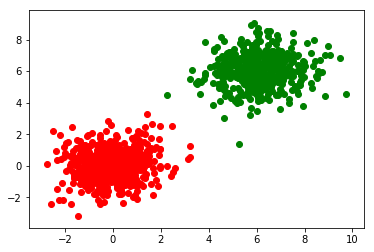

In [6]:
for ix in list(range(dist_01.shape[0])):
    plt.scatter(dist_01[ix,0],dist_01[ix,1],c='r')
    plt.scatter(dist_02[ix,0],dist_02[ix,1],c='g')
plt.show()

In [9]:
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows,cols))
print(data.shape)

(1000, 3)


In [12]:
data[:dist_01.shape[0],:-1] = dist_01
data[dist_01.shape[0]:rows, :-1] = dist_02

data[dist_01.shape[0]:rows, -1] = 1

In [13]:
split_factor = 0.85
split = int(data.shape[0]*split_factor)
print(split)

850


In [16]:
print(data.shape)
train_data = data[:split]
test_data = data[split:]

X_train = train_data[:,:-1]
X_test = test_data[:,:-1]

Y_train = train_data[:,-1]
Y_test = test_data[:,-1]

print(X_test.shape)
print(X_train.shape)


(1000, 3)
(150, 2)
(850, 2)


In [17]:
def distance(p1,p2):
    dist = np.sqrt(((p1-p2)**2).sum())
    return dist

In [35]:
def KNN(test_point,x_train,y_train,k=5):
    d = []
    for ix in list(range(x_train.shape[0])):
        dist = distance(test_point,x_train[ix])
        d.append((dist,y_train[ix]))
        
    d = np.array(d)
    sorted_vals= sorted(d,key=lambda z:z[0])
    sorted_vals = np.array(sorted_vals)[:k]
    
    freq = np.unique(sorted_vals[:,-1],return_counts=True)
    label = freq[0][freq[1].argmax()]
    return label

In [36]:
predictions = []

for ix in list(range(X_test.shape[0])):
    prediction_val = KNN(X_test[ix],X_train,Y_train,1)
    predictions.append(prediction_val)

In [37]:
print(predictions[:10],Y_test[:10])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [38]:
print(np.sum(np.array(predictions)==Y_test)/float(X_test.shape[0]))

1.0


In [39]:
dn = pd.read_csv('/home/dev/SIH/titanic/titanic_train.csv')

In [40]:
dn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
dn = dn.drop(['Name','Ticket','Cabin'],axis=1)

In [43]:
dn.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dn.iloc[:,3:4] = le.fit_transform(dn.iloc[:,3:4])
dn =dn.drop(['Embarked'],axis=1)
dn.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [56]:
dn = dn.dropna()

In [61]:
X = dn.drop(['Survived'],axis=1)
Y= dn.iloc[:,1:2]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
#print(knn.score(X_test,Y_test))

0.7627906976744186


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
